In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
import visualkeras

In [8]:
num_letters = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F',
               6: 'G', 7: 'H', 8: 'I', 9: 'K',
               10: 'L', 11: 'M', 12: 'N', 13: 'O', 14: 'P',
               15: 'Q', 16: 'R', 17: 'S', 18: 'T', 19: 'U',
               20: 'V', 21: 'W', 22: 'X', 23: 'Y'}

df = pd.read_csv("../data/DS2.csv")

In [9]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel14692,pixel14693,pixel14694,pixel14695,pixel14696,pixel14697,pixel14698,pixel14699,pixel14700,Unnamed: 14701
0,A,101,99,100,246,244,245,247,245,246,...,112,105,113,112,102,113,59,49,60,NaN
1,A,207,212,208,208,213,209,210,215,211,...,85,73,83,84,71,81,81,68,78,NaN
2,A,134,133,131,134,133,131,135,134,132,...,25,26,30,30,31,35,33,34,38,NaN
3,A,1,3,0,61,63,58,153,155,150,...,16,15,20,3,2,7,0,0,2,NaN
4,A,12,7,3,123,118,114,233,230,225,...,80,79,93,45,44,58,8,7,21,NaN


In [10]:
del df['Unnamed: 14701']

In [11]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel14691,pixel14692,pixel14693,pixel14694,pixel14695,pixel14696,pixel14697,pixel14698,pixel14699,pixel14700
0,A,101,99,100,246,244,245,247,245,246,...,116,112,105,113,112,102,113,59,49,60
1,A,207,212,208,208,213,209,210,215,211,...,87,85,73,83,84,71,81,81,68,78
2,A,134,133,131,134,133,131,135,134,132,...,32,25,26,30,30,31,35,33,34,38
3,A,1,3,0,61,63,58,153,155,150,...,21,16,15,20,3,2,7,0,0,2
4,A,12,7,3,123,118,114,233,230,225,...,88,80,79,93,45,44,58,8,7,21


In [12]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('label', axis=1), df['label'], test_size=0.2, random_state=42)

lb = LabelBinarizer()

y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

x_train = x_train.values
x_test = x_test.values

x_train = x_train / 255
x_test = x_test / 255

x_train = x_train.reshape(-1, 70, 70, 3)
x_test = x_test.reshape(-1, 70, 70, 3)
print(x_train.shape)
print(x_test.shape)

(53687, 70, 70, 3)
(13422, 70, 70, 3)


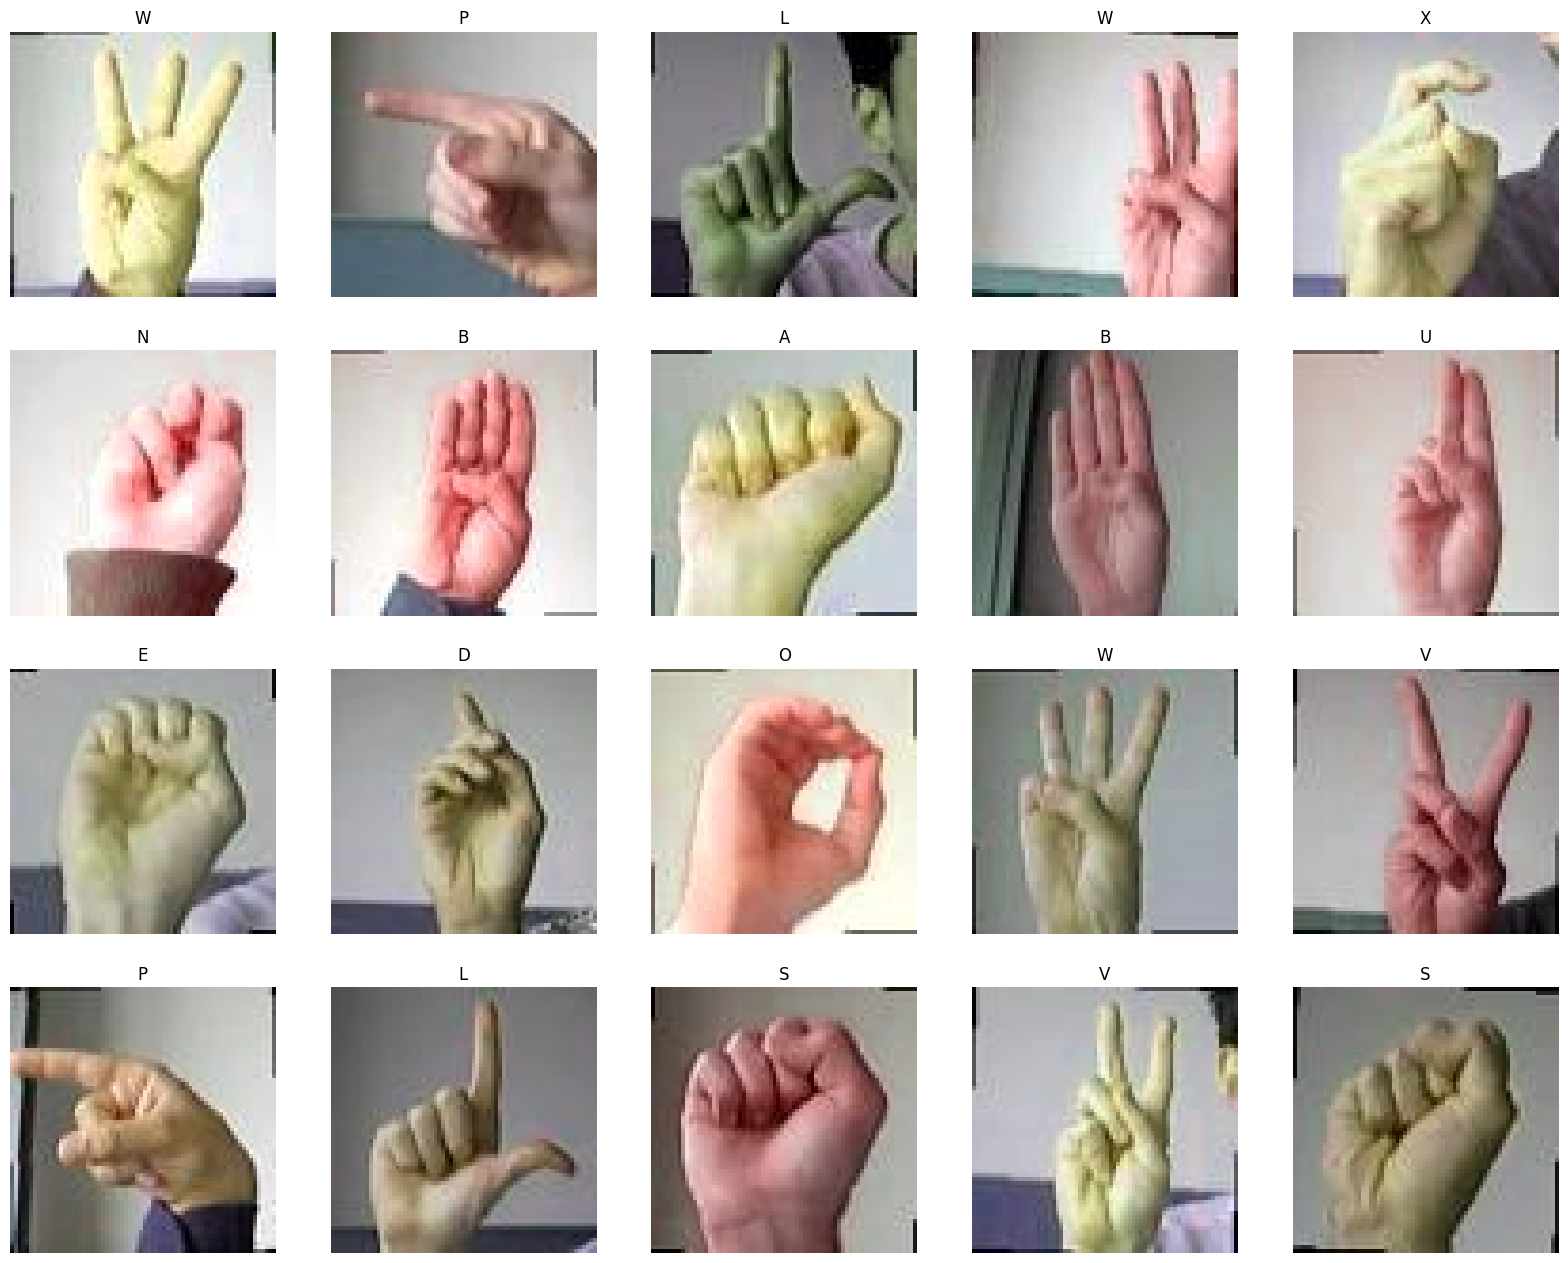

In [13]:
plt.figure(figsize=(20, 20))
for i in range(20):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(num_letters[np.argmax(y_train[i])])
    plt.axis('off')

In [14]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zoom_range=0.3,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip=False
)

datagen.fit(x_train)

In [15]:
learningRateReducer = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.0000000001)
earlyStopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, restore_best_weights=True)

model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(70, 70, 3)))
model.add(MaxPool2D((2,2), padding='same'))
model.add(BatchNormalization())

model.add(Dropout(0.1))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D((2,2), padding='same'))
model.add(BatchNormalization())

model.add(Dropout(0.1))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D((2,2), padding='same'))
model.add(BatchNormalization())

model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(units=512, activation='relu'))

model.add(Dropout(0.1))

model.add(Dense(units=24, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 70, 70, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 35, 35, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 35, 35, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 35, 35, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 18, 18, 64)        2

In [16]:
visualkeras.layered_view(model, legend=True).show()

In [17]:
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=20,
    validation_data=datagen.flow(x_test, y_test, batch_size=64),
    callbacks=[learningRateReducer, earlyStopping]
)

Epoch 1/20
839/839 [==============================] - 86s 82ms/step - loss: 2.3796 - accuracy: 0.3021 - val_loss: 1.1916 - val_accuracy: 0.6043
Epoch 2/20
839/839 [==============================] - 60s 71ms/step - loss: 0.6781 - accuracy: 0.7646 - val_loss: 0.4450 - val_accuracy: 0.8470
Epoch 3/20
839/839 [==============================] - 60s 72ms/step - loss: 0.3679 - accuracy: 0.8739 - val_loss: 0.2084 - val_accuracy: 0.9317
Epoch 4/20
839/839 [==============================] - 59s 71ms/step - loss: 0.2697 - accuracy: 0.9099 - val_loss: 0.2020 - val_accuracy: 0.9312
Epoch 5/20
839/839 [==============================] - 58s 69ms/step - loss: 0.2113 - accuracy: 0.9296 - val_loss: 0.2828 - val_accuracy: 0.9093
Epoch 6/20
839/839 [==============================] - 59s 71ms/step - loss: 0.1810 - accuracy: 0.9411 - val_loss: 0.8990 - val_accuracy: 0.7723

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 7/20
839/839 [==============================] - 5

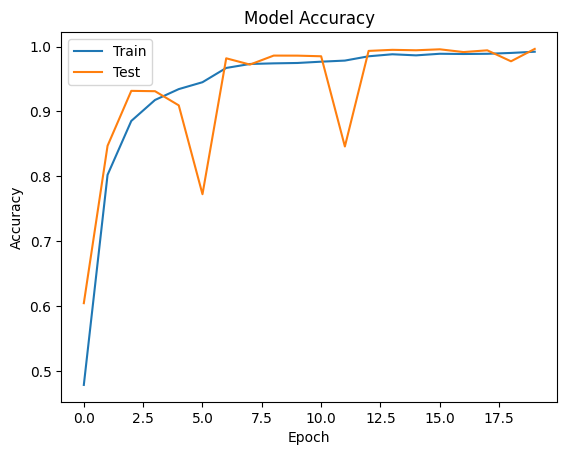

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

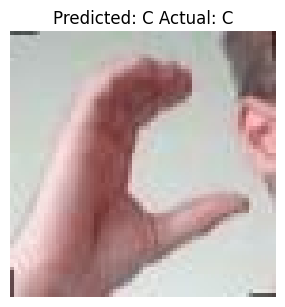

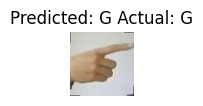

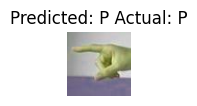

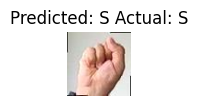

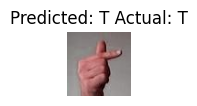

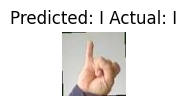

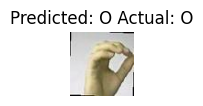

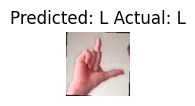

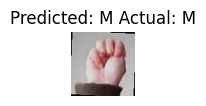

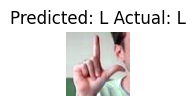

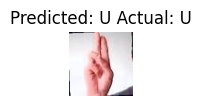

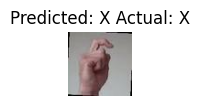

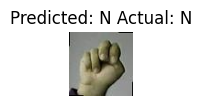

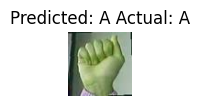

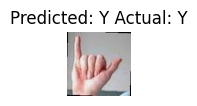

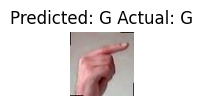

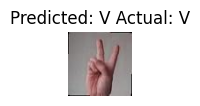

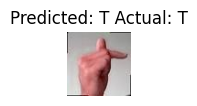

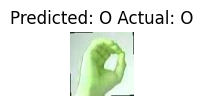

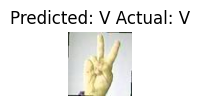

In [19]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)  

plt.figure(figsize=(20, 20))
for i in range(20):
    ind = random.randint(0, len(y_pred))
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[ind])
    plt.title("Predicted: " + num_letters[y_pred[ind]] + " Actual: " + num_letters[y_test[ind]])
    plt.axis('off')
    plt.show()

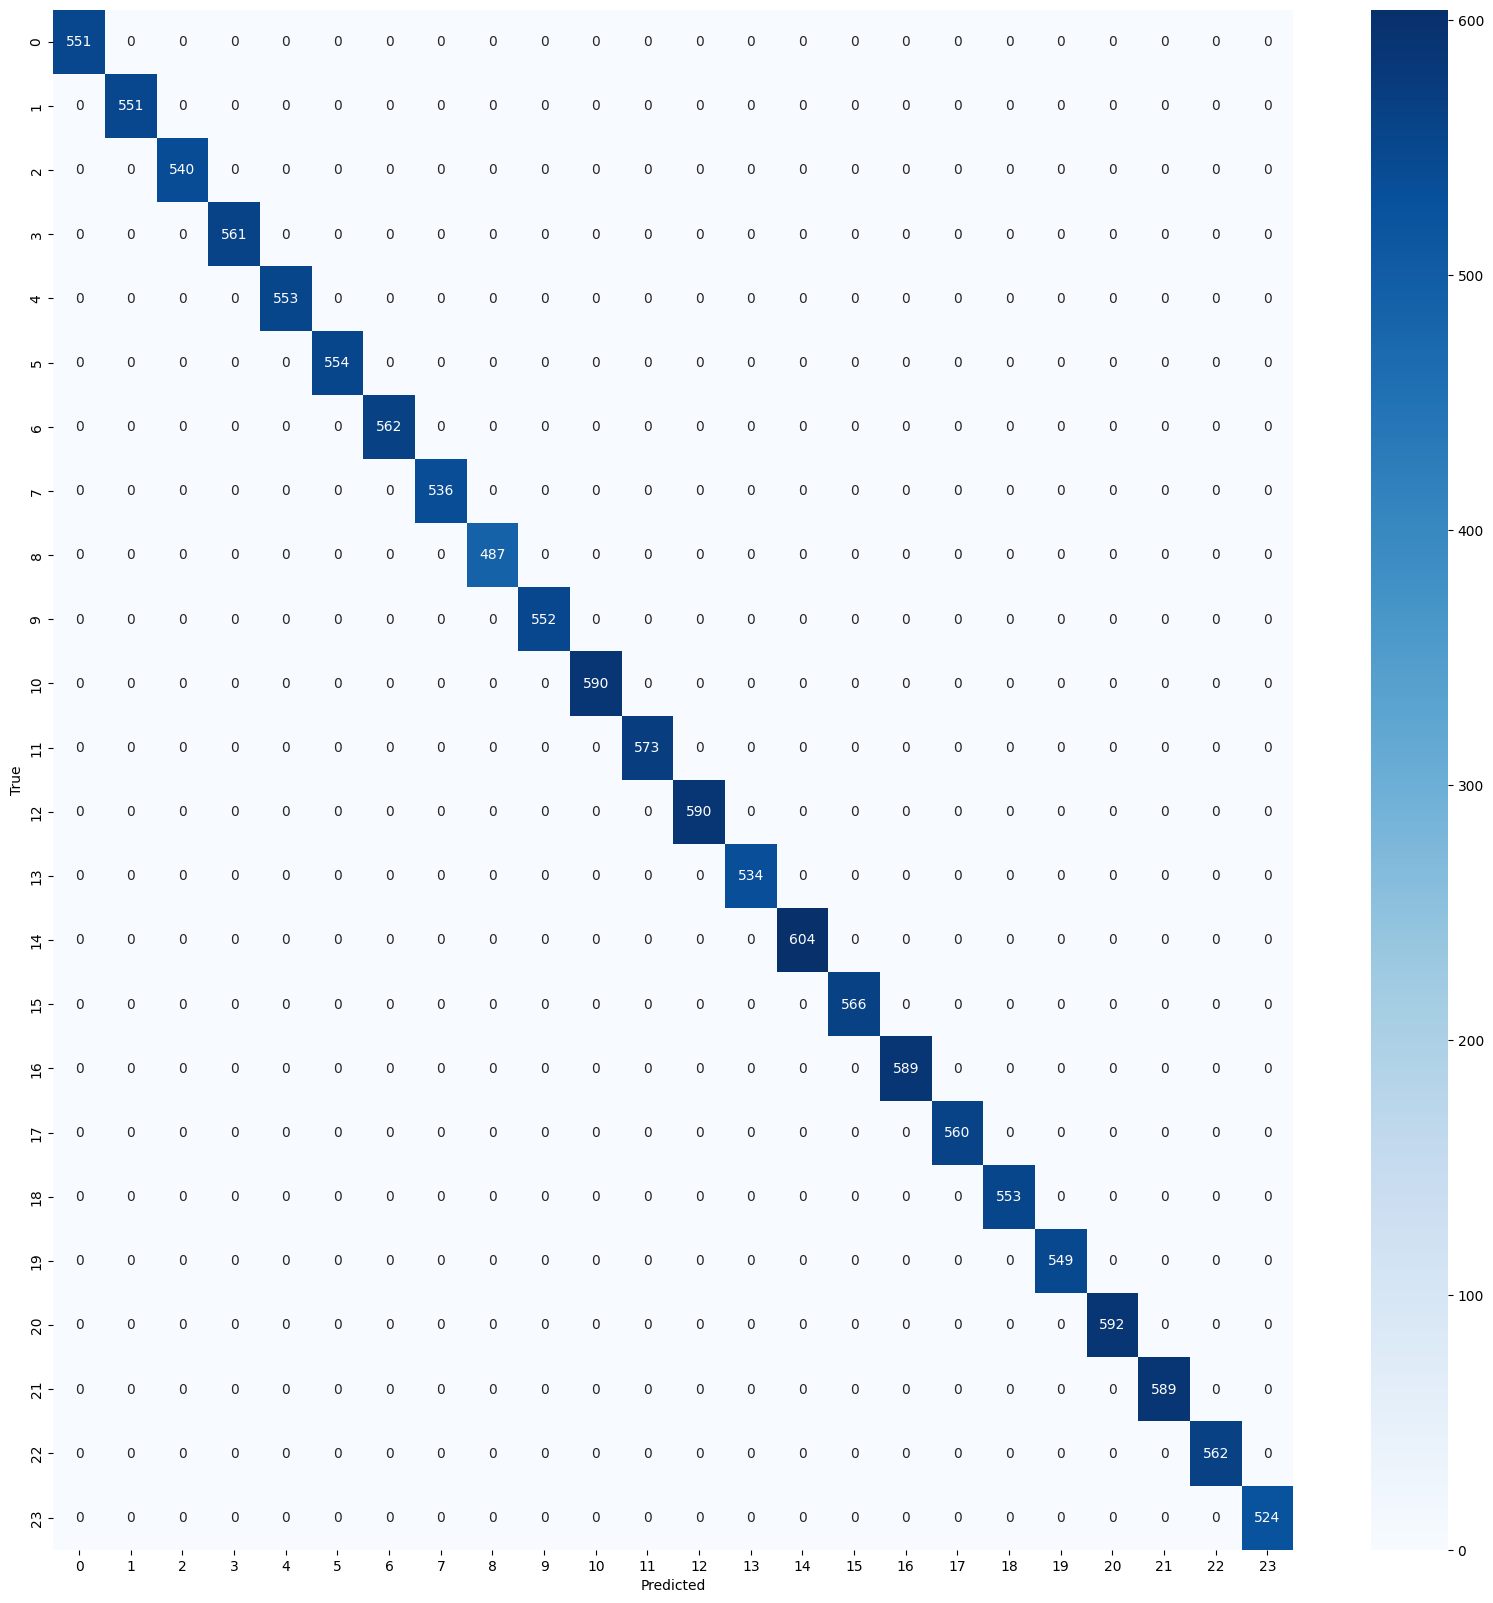

In [20]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()